# K Nearest Neighbors using Scikit-Learn

#### Python Imports

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [19]:
%matplotlib inline
plt.style.use('seaborn')

#### Python Function to Illustrate KNN

In [20]:
def knn_visual(s):
    r_x = [1.0, 1.5, 2.0, 2.5, 3.0]
    r_y = [1.8, 2.4, 1.1, 2.2, 2.3]
    b_x = [4.5, 5.0, 5.5, 6.0]
    b_y = [4.2, 3.8, 4.4, 4.0]
    plt.xlim(0.0, 7.0)
    plt.ylim(0.0, 7.0)
    plt.scatter(r_x, r_y, color='salmon', marker='D')
    plt.scatter(b_x, b_y, color='dodgerblue', marker='s')
    if s > 1:
        plt.plot(3.5, 3.1, marker='o', markerfacecolor='limegreen', markersize=10)
    if s > 2:
        plt.plot([3.5, 3.0], [3.1, 2.3], color='gray', linestyle='--')
        plt.annotate('0.80', xy=(3.3, 2.5), fontsize=11, weight='bold', color='gray')
        plt.plot([3.5, 2.5], [3.1, 2.2], color='gray', linestyle='--')
        plt.annotate('1.35', xy=(2.6, 2.7), fontsize=11, weight='bold', color='gray')
        plt.plot([3.5, 4.5], [3.1, 4.2], color='gray', linestyle='--')
        plt.annotate('1.49', xy=(3.6, 3.7), fontsize=11, weight='bold', color='gray')
    plt.show()

#### KNN Concept Illustrations

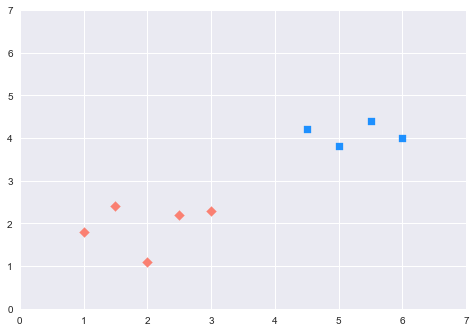

In [21]:
knn_visual(1)

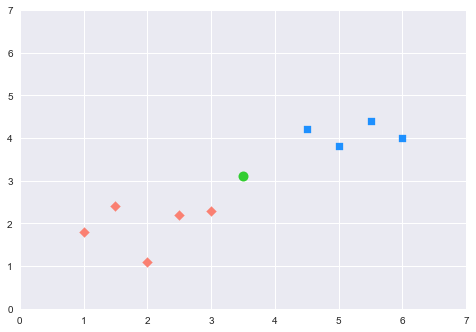

In [22]:
knn_visual(2)

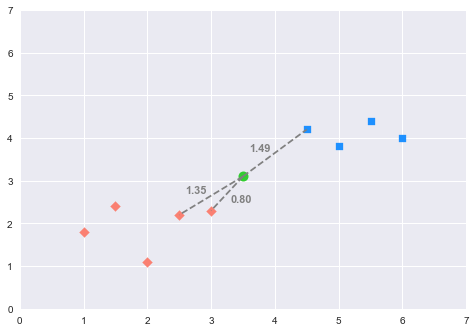

In [23]:
knn_visual(3)

#### Load and Display the Glass Identification Data Set
Source: [UCI Machine Learning Repository - Glass Identification Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data)

**Attribute**

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
    - 1 building_windows_float_processed
    - 2 building_windows_non_float_processed
    - 3 vehicle_windows_float_processed
    - 4 vehicle_windows_non_float_processed (none in this database)
    - 5 containers
    - 6 tableware
    - 7 headlamps

In [24]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
glass_df = pd.read_csv(url, header=None)
glass_df = glass_df.drop(glass_df.columns[0], axis=1)
glass_df.columns = ['r_index', 'sodium', 'magnesium', 'aluminum', 'silicon', 'potassium', 'calcium', 'barium', 'iron', 'glass_type']
glass_df

,r_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


#### Display the feature information about the Glass Identification data set

In [25]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   r_index     214 non-null    float64
 1   sodium      214 non-null    float64
 2   magnesium   214 non-null    float64
 3   aluminum    214 non-null    float64
 4   silicon     214 non-null    float64
 5   potassium   214 non-null    float64
 6   calcium     214 non-null    float64
 7   barium      214 non-null    float64
 8   iron        214 non-null    float64
 9   glass_type  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


#### Create the training and test data sets

In [26]:
X_train, X_test, y_train, y_test = train_test_split(glass_df, glass_df['glass_type'], test_size=0.25, random_state=101)
X_train = X_train.drop('glass_type', axis=1)
X_test = X_test.drop('glass_type', axis=1)

#### Scale the training and test data set

In [27]:
scaler = StandardScaler()
s_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
s_X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns, index=X_test.index)

#### Initialize and fit the KNN model

In [28]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(s_X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### Predict the target `glass_type` using the test data set

In [29]:
y_predict = model.predict(s_X_test)

#### Display the accuracy score

In [30]:
accuracy_score(y_test, y_predict)

0.6111111111111112

#### Perform grid search to find and display the optimal hyperparameter

In [35]:
parameters = {
    'n_neighbors': range(1, 26, 2)
}
cv_model = GridSearchCV(estimator=model, param_grid=parameters, cv=5, verbose=1, scoring='accuracy')
cv_model.fit(s_X_train, y_train)
cv_model.best_params_

Fitting 5 folds for each of 13 candidates, totalling 65 fits


{'n_neighbors': 1}

#### Re-Initialize and fit the Gaussian Naive Bayes model with the optimal hyperparameter

In [32]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(s_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Predict the target `glass_type` using the test data set

In [33]:
y_predict = model.predict(s_X_test)

#### Display the accuracy score

In [34]:
accuracy_score(y_test, y_predict)

0.6851851851851852